In [84]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
data = pd.read_csv('../transfers1.0.csv', skipinitialspace=True)
data.head()

,Unnamed: 0,ID,to_club_name,to_league_name,player_name,age,position,from_club_involved_name,fee,transfer_movement,fee_cleaned,year,season
0,0,1,Middlesbrough FC,Championship,Derek Whyte,24.0,Centre Back,Rangers,£1.13m,in,1.13,1992,1992/1993
1,2,3,Bayer 04 Leverkusen,1 Bundesliga,Pavel Hapal,22.0,Attacking Midfield,Sigma Olomouc,£1.13m,in,1.13,1992,1992/1993
2,3,4,VfB Stuttgart,1 Bundesliga,André Golke,27.0,Attacking Midfield,1.FC Nuremberg,£1.13m,in,1.13,1992,1992/1993
3,4,5,SV Werder Bremen,1 Bundesliga,Bernd Hobsch,24.0,Centre Forward,VfB Leipzig,£1.13m,in,1.13,1992,1992/1993
4,5,6,PSV Eindhoven,Eredivisie,Arthur Numan,22.0,Left Back,FC Twente,£1.15m,in,1.15,1992,1992/1993


## Categorizing Positions

In [40]:
data.position.value_counts()

Centre Forward        3281
Centre Back           2574
Central Midfield      1546
Defensive Midfield    1224
Attacking Midfield     925
Left Back              910
Goalkeeper             878
Right Back             842
Right Winger           736
Left Winger            698
Left Midfield          360
Second Striker         260
Right Midfield         255
Midfielder             102
Forward                 67
Defender                52
Sweeper                 22
Name: position, dtype: int64

In [50]:
data['position'].values

array(['Centre Back', 'Attacking Midfield', 'Attacking Midfield', ...,
       'Left Winger', 'Left Back', 'Left Back'], dtype=object)

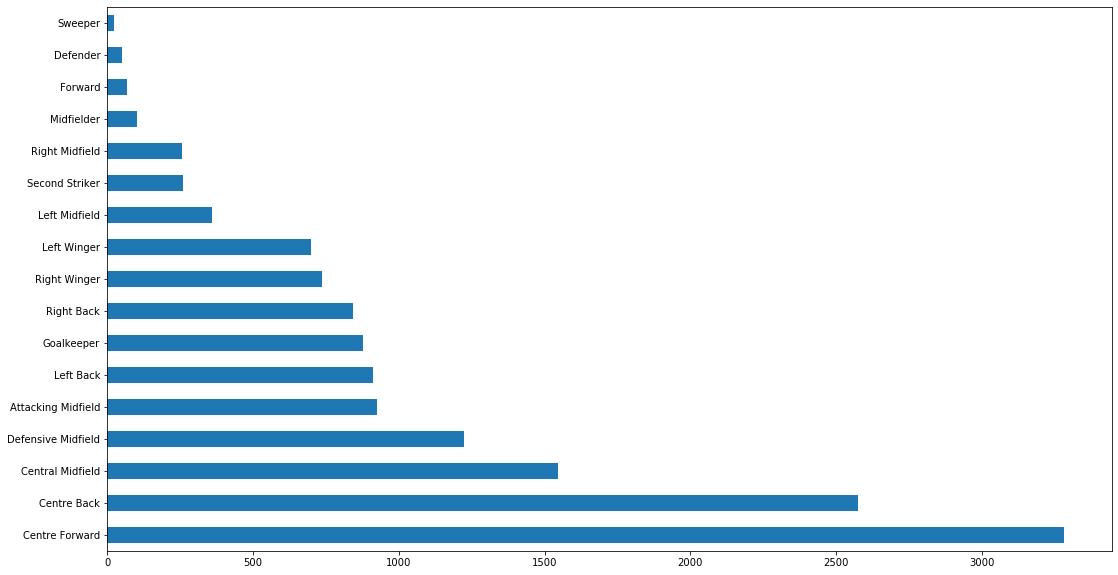

In [41]:
fig, ax = plt.subplots(figsize=(18,10))
data.position.value_counts().plot(kind = "barh")

#### The above visualization tells us which are the prominent positions 

This one kind of suggested grouping :- Grouping_positions_1

- Centre Forwards(CF): Second Striker, Forwards
- Centre Backs(CB): Defenders, Sweeper
- Central Midfielders(CM): Midfielder
- Defensive Midfielders(CDM)
- Attacking Midfielders(CAM)
- Left Back(LB)
- Goalkeeper(GK)
- Right Back(RB)
- Right Winger(RW): Right Midfielder
- Left Winger(LW): Left midfielder


Another suggested catgeorization that would reduce the number of variables:- Grouping_positions_2

- Fowards(F): Centre Forwards, Second Striker, Forwards
- Wingers(W): Right Winger, Left Winger, Right Midfielder, Left midfielder
- Midfield(M): Central Midfielders, Midfielder,Defensive Midfielders, Attacking Midfielders
- Wingacks(B): Left Back, Right Back
- Defenders(D): Centre Backs, Defenders, Sweeper
- Goalkeepers(G)


#### Implementing grouping 1

In [85]:
for i in range(data.shape[0]):
    if(data.position[i] in ['Centre Forward','Second Striker','Forward']):
        data.grouping_positions_1[i] = 'CF'
    elif(data.position[i] in ['Centre Back', 'Defender', 'Sweeper']):
        data.grouping_positions_1[i] = 'CB'
    elif(data.position[i] in ['Central Midfield', 'Midfielder']):
        data.grouping_positions_1[i] = 'CM'
    elif(data.position[i] in ['Right Winger', 'Right Midfield']):
        data.grouping_positions_1[i] = 'RW'
    elif(data.position[i] in ['Left Winger', 'Left Midfield']):
        data.grouping_positions_1[i] = 'LW'
    elif(data.position[i] in ['Defensive Midfield']):
        data.grouping_positions_1[i] = 'CDM'
    elif(data.position[i] in ['Attacking Midfield']):
        data.grouping_positions_1[i] = 'CAM'
    elif(data.position[i] in ['Left Back']):
        data.grouping_positions_1[i] = 'LB'
    elif(data.position[i] in ['Right Back']):
        data.grouping_positions_1[i] = 'RB'
    else:
        data.grouping_positions_1[i] = 'GK'

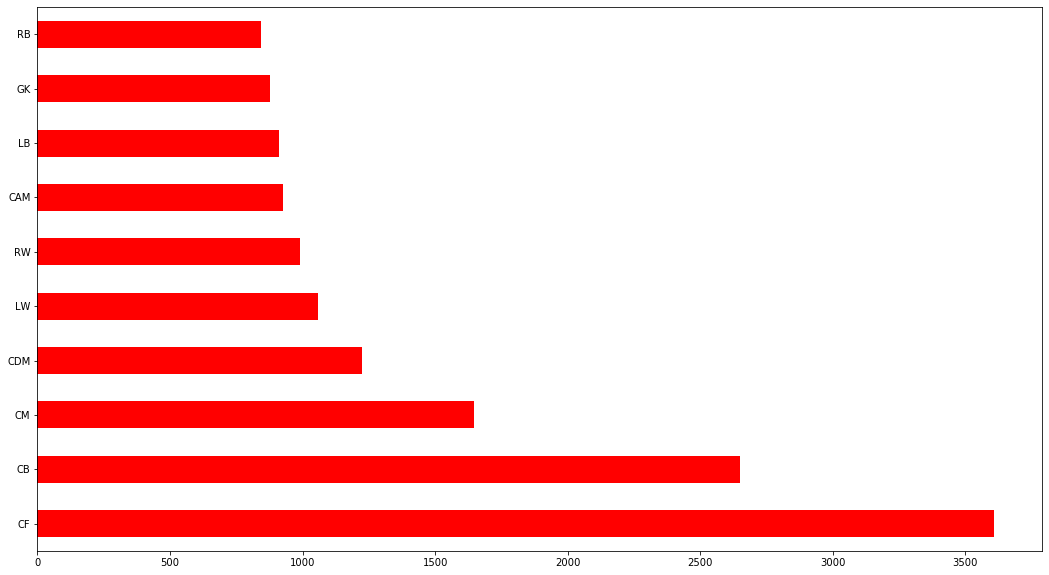

In [86]:
fig, ax = plt.subplots(figsize=(18,10))
data.grouping_positions_1.value_counts().plot(kind = "barh", color = 'red')

#### Implementing grouping 2

In [87]:
data['grouping_positions_2'] = 0
for i in range(data.shape[0]):
    if(data.position[i] in ['Centre Forward','Second Striker','Forward']):
        data.grouping_positions_2[i] = 'F'
    elif(data.position[i] in ['Centre Back', 'Defender', 'Sweeper']):
        data.grouping_positions_2[i] = 'D'
    elif(data.position[i] in ['Left Back', 'Right Back']):
        data.grouping_positions_2[i] = 'B'
    elif(data.position[i] in ['Right Winger', 'Right Midfield', 'Left Winger', 'Left Midfield']):
        data.grouping_positions_2[i] = 'W'
    elif(data.position[i] in ['Defensive Midfield', 'Attacking Midfield', 'Central Midfield', 'Midfield']):
        data.grouping_positions_2[i] = 'M'
    else:
        data.grouping_positions_2[i] = 'GK'

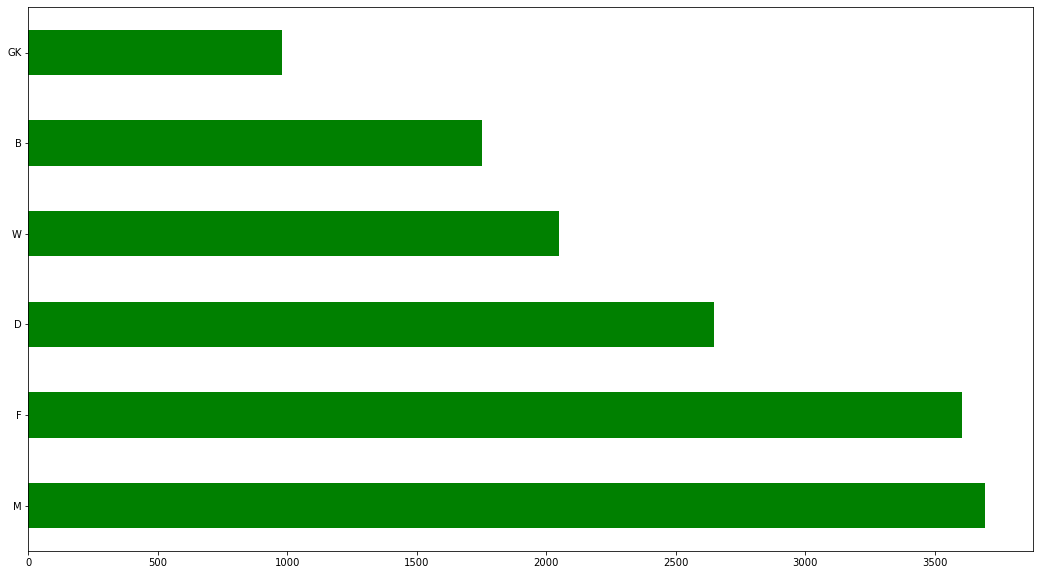

In [88]:
fig, ax = plt.subplots(figsize=(18,10))
data.grouping_positions_2.value_counts().plot(kind = "barh", color = 'green')

## Leagues

In [89]:
data.to_league_name.value_counts()

Premier League      2561
Serie A             2480
Championship        2214
1 Bundesliga        2190
Primera Division    1455
Ligue 1             1419
Premier Liga        1051
Eredivisie           759
Liga Nos             603
Name: to_league_name, dtype: int64

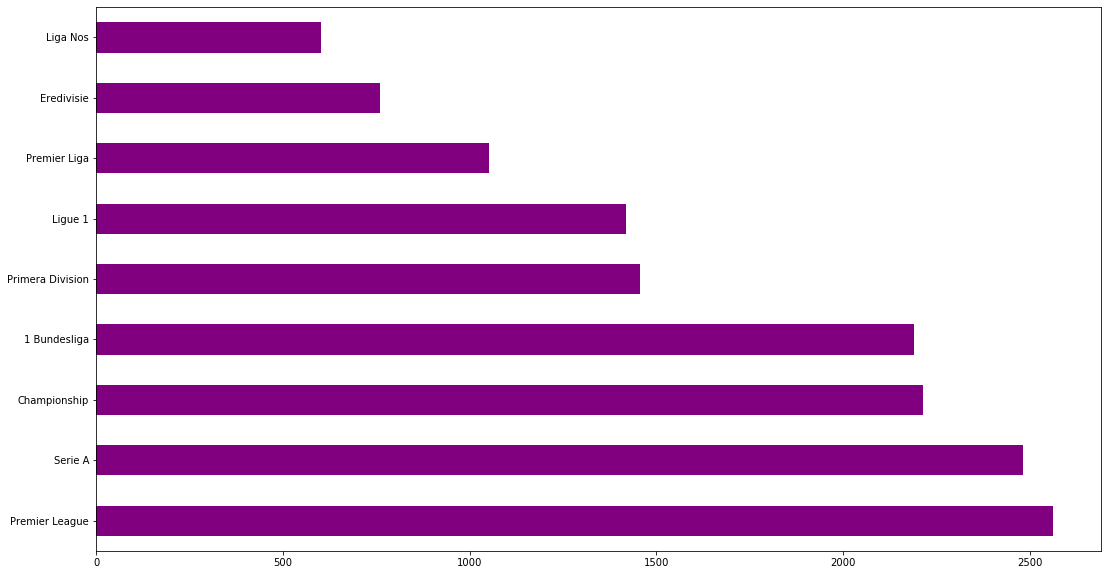

In [90]:
fig, ax = plt.subplots(figsize=(18,10))
data.to_league_name.value_counts().plot(kind = "barh", color = 'purple')

The above graph shows us how the data is spread out among the leagues, the only outlier is the league 'Championship' cause it is a division 2 league. A decision has to be made on that.

In [107]:
data.groupby(['to_club_name', 'to_league_name']).size()

to_club_name             to_league_name
1. FC Köln               1 Bundesliga      80
1.FC Kaiserslautern      1 Bundesliga      71
1.FC Nuremberg           1 Bundesliga      52
1.FC Saarbrücken         1 Bundesliga       1
1.FC Union Berlin        1 Bundesliga       5
                                           ..
Willem II Tilburg        Eredivisie        18
Wimbledon FC             Premier League    21
Wolverhampton Wanderers  Championship      57
                         Premier League    36
Zenit St. Petersburg     Premier Liga      96
Length: 374, dtype: int64

In [108]:
data.to_csv('../transfers1.1.csv')